## Advanced Lane Detection
---
### Goals & Objectives

The goals / steps of this project are the following:
- Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
- Apply a distortion correction to raw images.
- Use color transforms, gradients, etc., to create a thresholded binary image.
- Apply a perspective transform to rectify binary image ("birds-eye view").
- Detect lane pixels and fit to find the lane boundary.
- Determine the curvature of the lane and vehicle position with respect to center.
- Warp the detected lane boundaries back onto the original image.
- Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.
---

### 1. Camera Calibration

19/20 camera calibration images processed.


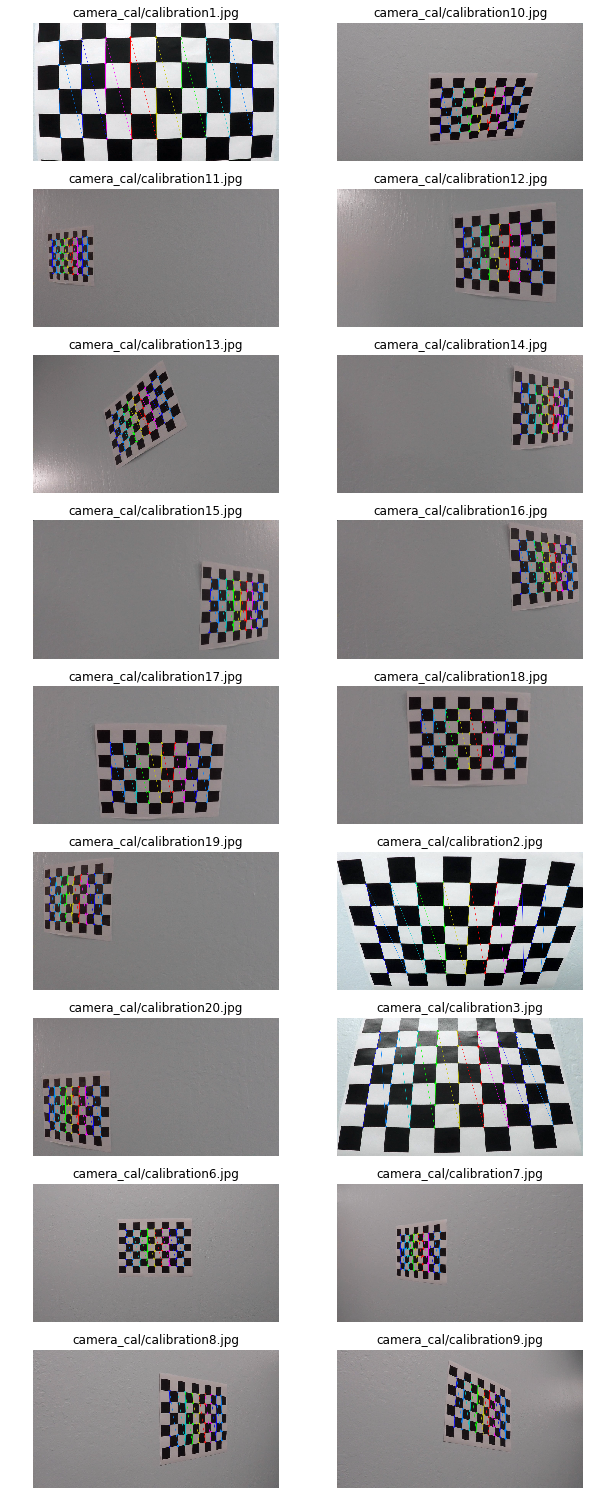

In [4]:
import cv2
import os
import matplotlib.pyplot as plt
from utils import utils
%matplotlib inline

CAL_IMAGE_PATH ='camera_cal/calibration*.jpg'
calibration, fig = utils.get_calibration(CAL_IMAGE_PATH)
fig.set_size_inches(10,30)

Applying this distortion correction to a test chessboard image, using the undistort() function from utils/utils.py, we obtain the following results:

In [5]:
calibration['mtx']

array([[  1.15709839e+03,   0.00000000e+00,   6.72117343e+02],
       [  0.00000000e+00,   1.15366948e+03,   3.89360093e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [ ]:
calibration['mtx']

([], <a list of 0 Text yticklabel objects>)

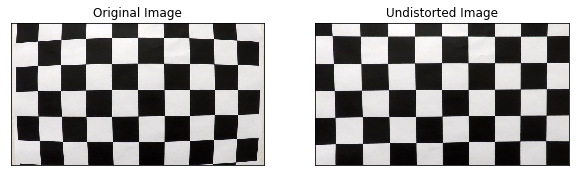

In [6]:
CHESS_IMAGE_PATH = 'camera_cal/calibration1.jpg'
test_image = plt.imread(CHESS_IMAGE_PATH)
MTX = calibration['mtx'] 
DIST = calibration['dist']
undistorted_img = utils.undistort(test_image, MTX, DIST)
plt.figure(figsize=(10,50))
plt.subplot(121)
plt.imshow(test_image)
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(undistorted_img)
plt.title('Undistorted Image')
plt.xticks([])
plt.yticks([])

## Pipeline (single images)
----
### 1. Camera distortion correction
We use the the Camera Matrix (mtx) and the Distortion Coefficients (dist) calculated on the camera calibration to a raw images from the car video. 

([], <a list of 0 Text yticklabel objects>)

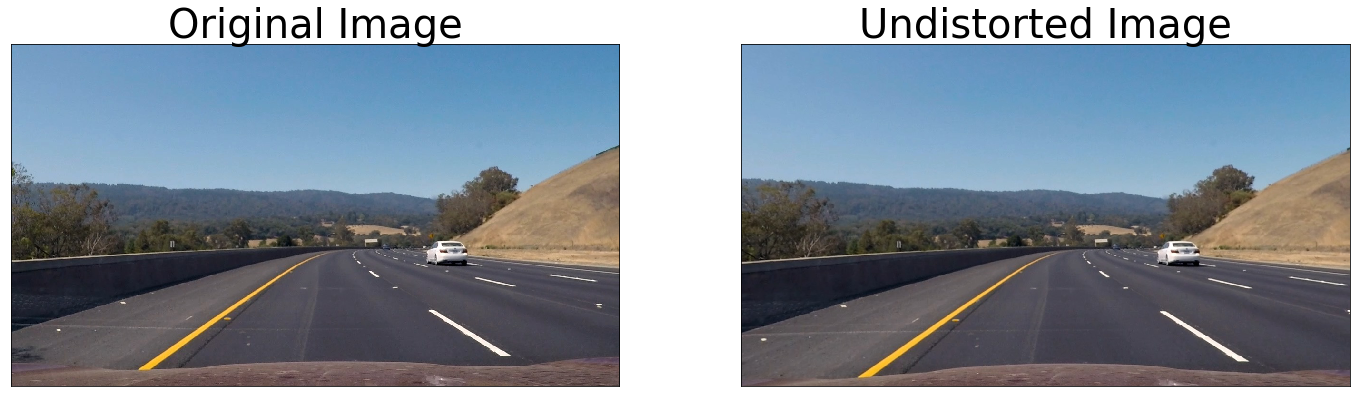

In [374]:
CAR_IMAGE_PATH = 'test_images/test3.jpg'
test_image = plt.imread(CAR_IMAGE_PATH)
undistorted_img = utils.undistort(test_image,MTX, DIST)

plt.figure(figsize=(24, 9))
plt.subplot(121)
plt.imshow(test_image)
plt.title('Original Image',fontsize=40)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(undistorted_img)
plt.title('Undistorted Image',fontsize=40)
plt.xticks([])
plt.yticks([])

### 2. Image Thresholding

In [463]:
from utils import utils
# autoreload plugin
# this will automatically update the imported modules with the changes made on the fly in the functions.py script
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


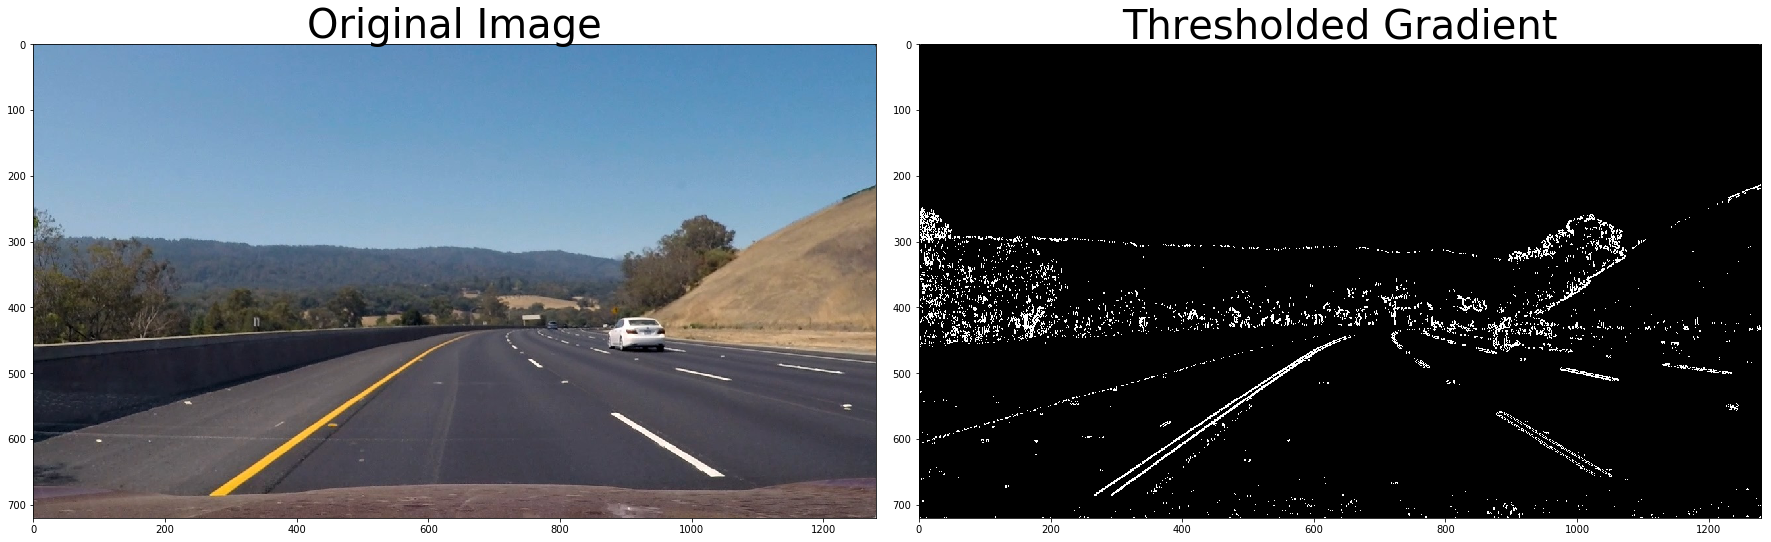

In [436]:
# Apply Sobel
grad_binary = utils.abs_sobel_thresh(test_image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

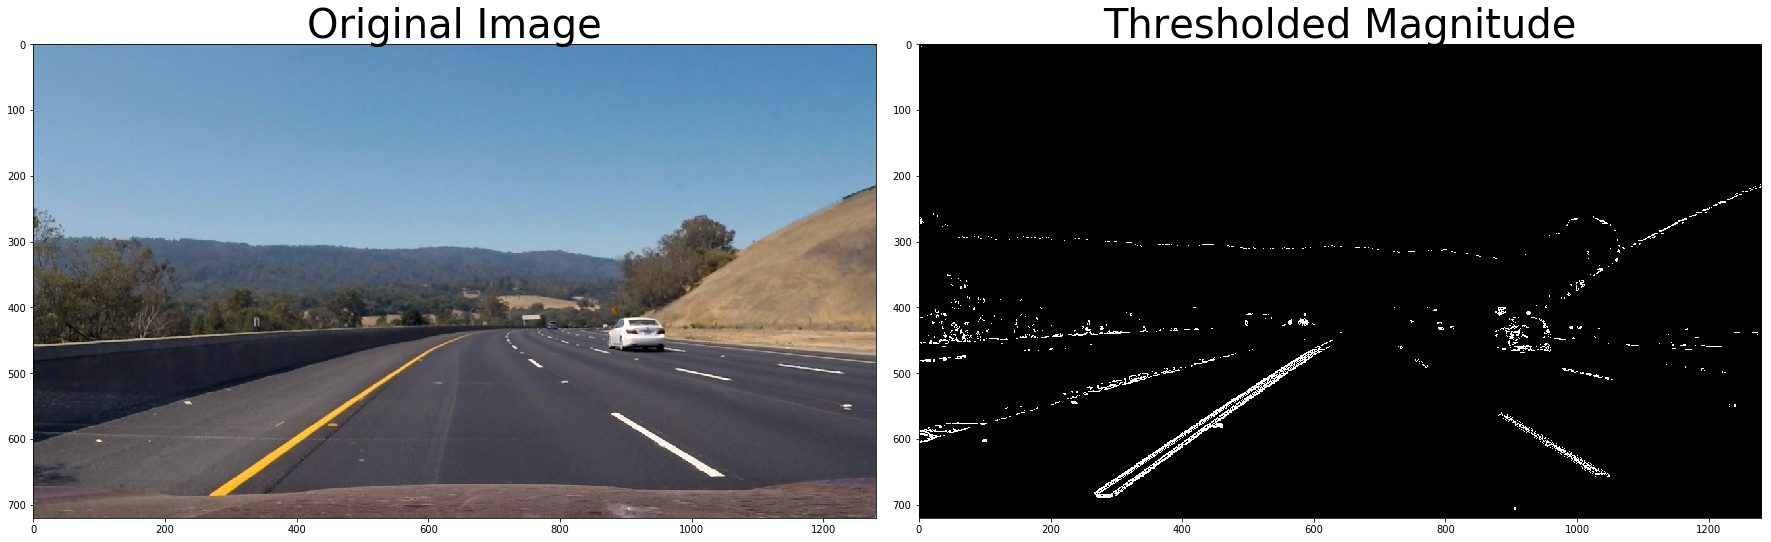

In [377]:
# Apply sobel, compute the magnitude of the gradient and apply a threshold
mag_binary = utils.mag_thresh(test_image, sobel_kernel=3, mag_thresh=(30, 100))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Using a magnitude for the gradient of (30, 100) seems to work pretty well in identifying the lanes,especially the left yellow lane.


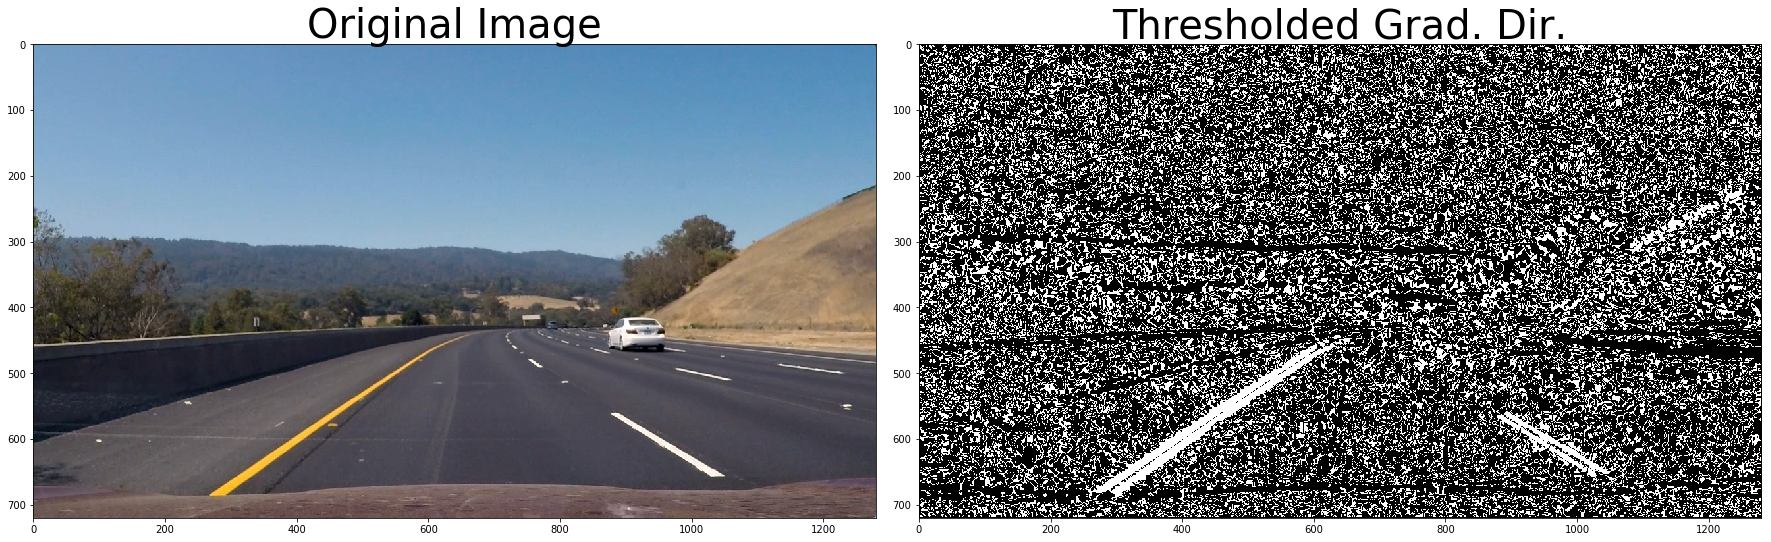

In [378]:
# Compute the direction of the gradient and apply a threshold.
dir_binary = utils.dir_thres(test_image, sobel_kernel=15, thresh=(0.7, 1.20))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=40)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

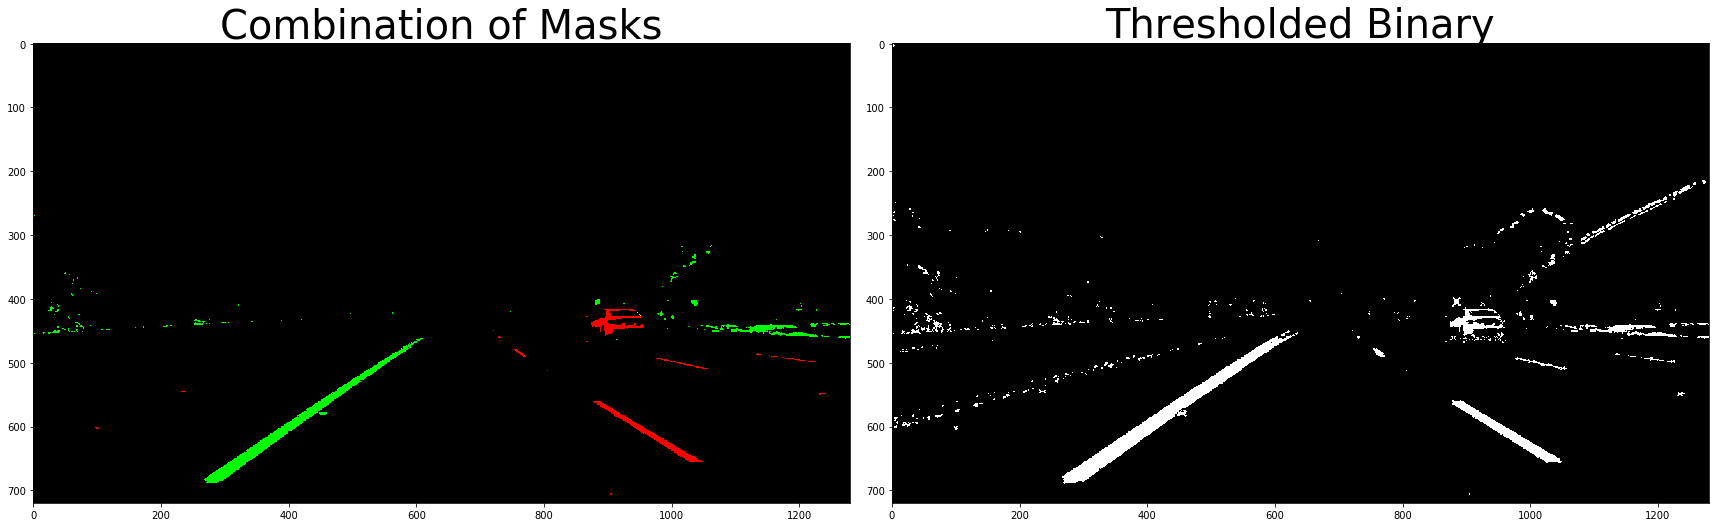

In [379]:
CAR_IMAGE_PATH = 'test_images/test3.jpg'
test_image = plt.imread(CAR_IMAGE_PATH)

f, (ax1, ax2) = plt.subplots(2, 2, figsize=(24, 9))
f.tight_layout()
plt.subplot(1,2,1)
thresholded = utils.threshold(test_image, color=True)
plt.imshow(thresholded)
plt.title('Combination of Masks',fontsize=40)

plt.subplot(1,2,2)
bin_thresholded = utils.threshold(test_image,mag_dir_thresh=True)
plt.imshow(bin_thresholded, cmap='gray')
plt.title('Thresholded Binary',fontsize=40)

### 3. Perspective Transformation

In [419]:
img_size = (bin_thresholded.shape[1], bin_thresholded.shape[0])
offset = 200
src = np.float32([
     [  590. ,  445.],
     [  691. ,  445.],
     [ 1120.  , 673.],
     [  153.   ,673.]])
            
dst = np.float32([[offset, 0], [img_size[0] - offset, 0], [img_size[0] - offset, img_size[1]], [offset, img_size[1]]])
    
# Compute the perspective transform M
M = cv2.getPerspectiveTransform(src, dst)
    
# Compute the inverse
Minv = cv2.getPerspectiveTransform(dst, src)

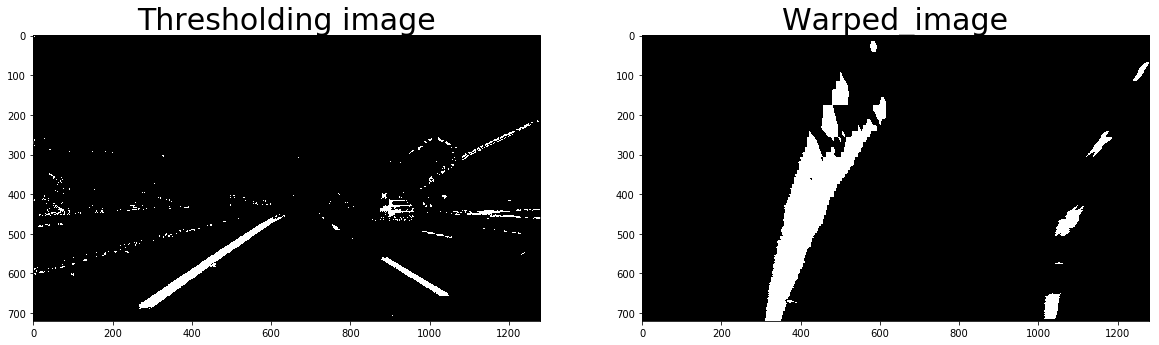

In [422]:
bin_warped = cv2.warpPerspective(bin_thresholded, M, img_size)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Thresholding image',fontsize=30)
ax1.imshow(bin_thresholded, cmap='gray')
ax2.set_title('Warped_image',fontsize=30)
ax2.imshow(bin_warped, cmap='gray')

In [470]:
dst

array([[  200.,     0.],
       [ 1080.,     0.],
       [ 1080.,   720.],
       [  200.,   720.]], dtype=float32)

### 4. Lane Detection

In [423]:
#bin_warped.shape[0]
histogram = np.sum(bin_warped[int(bin_warped.shape[0]/2):, :], axis=0)
#histogram = np.sum(bin_warped[bin_warped.shape[0]/2:,:], axis=0)

In [454]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Take a histogram of the bottom half of the image
histogram = np.sum(bin_warped[int(bin_warped.shape[0]/2):, :], axis=0)

# Create an output image to draw on and  visualize the result
out_img = np.dstack((bin_warped, bin_warped, bin_warped))*255

# Finding peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Number of sliding windows
nwindows = 9

# Height of windows
window_height = np.int(bin_warped.shape[0]/nwindows)

# Identifing the x and y positions of all nonzero pixels in the image
nonzero = bin_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])


# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base

# Margin in which to search
margin = 100

# Minimum number of pixels found to recenter window
minpix = 50

# Empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Steping through windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = bin_warped.shape[0] - (window+1)*window_height
    win_y_high = bin_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    
    # Drawing the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
    
    # Identifing the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    
    # Appending these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    
    # Recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenating the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extracting left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

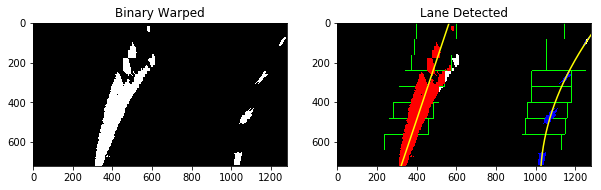

In [459]:
## Visualization
ploty = np.linspace(0, bin_warped.shape[0]-1, bin_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

plt.figure(figsize=(10,40))
plt.subplot(1,2,1)
plt.imshow(bin_warped, cmap='gray')
plt.title('Binary Warped')

plt.subplot(1,2,2)
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.title('Lane Detected')

### 5. Measuring Curvature

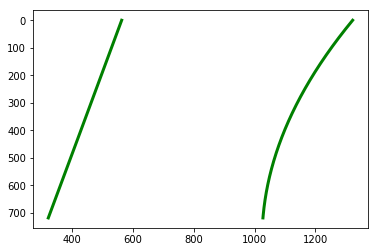

In [456]:
import numpy as np
import matplotlib.pyplot as plt

# Plot up the fake data
mark_size = 3

plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images

In [457]:
ym_per_pix = 30/720.0 # meters per pixel in y dimension
xm_per_pix = 3.7/700.0 # meters per pixel in x dimension
y_eval = 700
midx = 650

y1_left = (2*left_fit[0]*y_eval + left_fit[1])*xm_per_pix/ym_per_pix
y2_left = 2*left_fit[0]*xm_per_pix/(ym_per_pix*ym_per_pix)

y1_right = (2*right_fit[0]*y_eval + right_fit[1])*xm_per_pix/ym_per_pix
y2_right = 2*right_fit[0]*xm_per_pix/(ym_per_pix*ym_per_pix)

curvature_left = ((1 + y1_left*y1_left)**(1.5))/np.absolute(y2_left)
print("Radius of Curvature Left Lane: %f m" % curvature_left)

curvature_right = ((1 + y1_right*y1_right)**(1.5))/np.absolute(y2_right)
print("Radius of Curvature Right Lane: %f m" % curvature_right)

Radius of Curvature Left Lane: 76373.450736 m
Radius of Curvature Right Lane: 351.953445 m


#### Plotting the identified lane area back to the image:

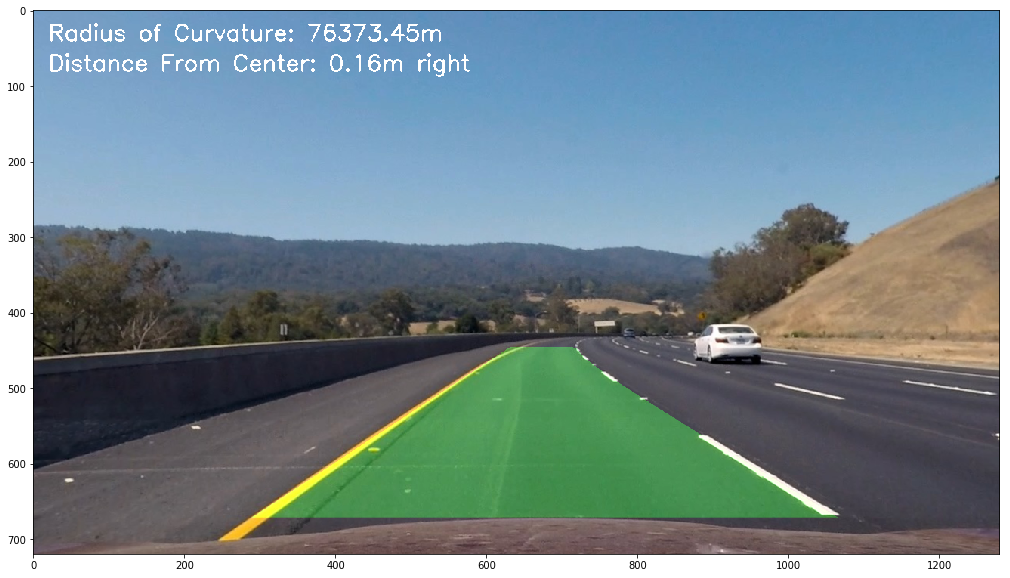

In [471]:
ploty = np.linspace(0, bin_warped.shape[0]-1, bin_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

warp_zero = np.zeros_like(bin_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
newwarp = cv2.warpPerspective(color_warp, Minv, (undistorted_img.shape[1], undistorted_img.shape[0])) 

# Combine the result with the original image
result = cv2.addWeighted(undistorted_img, 1, newwarp, 0.3, 0)

cv2.putText(result,'Radius of Curvature: %.2fm' % curvature_left,(20,40), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2)

x_left_pix = left_fit[0]*(y_eval**2) + left_fit[1]*y_eval + left_fit[2]
x_right_pix = right_fit[0]*(y_eval**2) + right_fit[1]*y_eval + right_fit[2]
position_from_center = ((x_left_pix + x_right_pix)/2 - midx) * xm_per_pix
if position_from_center < 0:
    text = 'left'
else:
    text = 'right'
cv2.putText(result,'Distance From Center: %.2fm %s' % (np.absolute(position_from_center), text),(20,80), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,255,255),2)
f, (ax1) = plt.subplots(1, figsize=(20,10))
plt.imshow(result)

### 6. Building the pipeline

In [464]:
from utils.line import Line
from utils.pipeline import Pipeline
from moviepy.editor import VideoFileClip
from IPython.display import HTML

line=Line()
pipeline.Pipeline.set_values(line, M, Minv, MTX, DIST)

white_output = 'project_video_out.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(Pipeline.pipeline)
%time white_clip.write_videofile(white_output, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

[MoviePy] >>>> Building video project_video_out.mp4
[MoviePy] Writing video project_video_out.mp4


100%|█████████▉| 1260/1261 [04:03<00:00,  6.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_out.mp4 

CPU times: user 3min 47s, sys: 32.4 s, total: 4min 19s
Wall time: 4min 4s
